In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy.random import normal, seed
from scipy.stats import norm
from numpy.random import choice
from pandas_datareader import data as pdr
import datetime

Index(['Unnamed: 0', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')


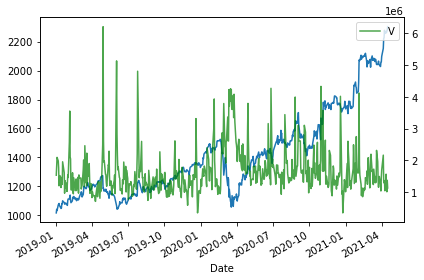

In [85]:

#print(current_date)
def generate_csv(symbol,filename):
    current_date=datetime.datetime.now()
    start_date=datetime.datetime(current_date.year-2,1,1)
    df = pdr.get_data_yahoo(symbol,start_date,current_date).reset_index()
    df.to_csv(filename)

generate_csv('GOOG','GOOG.csv')
generate_csv('NFLX','nflx.csv')
generate_csv('NIO','nio.csv')
generate_csv('DPZ','dpz.csv')
generate_csv('DIS','dis.csv')
generate_csv('AAPL','aapl.csv')
generate_csv('VMW','vmw.csv')
generate_csv('MSFT','MSFT.csv')
generate_csv('CSCO','CSCO.csv')
generate_csv('TSLA','TSLA.csv')
generate_csv('CGNX','CGNX.csv')
generate_csv('AMZN','AMZN.csv')
generate_csv('^GSPC','sp500.csv')

google=pd.read_csv('GOOG.csv',parse_dates=['Date'],index_col='Date')
netflix=pd.read_csv('nflx.csv',parse_dates=['Date'],index_col='Date')
nio=pd.read_csv('nio.csv',parse_dates=['Date'],index_col='Date')
dominos=pd.read_csv('dpz.csv',parse_dates=['Date'],index_col='Date')
disney=pd.read_csv('dis.csv',parse_dates=['Date'],index_col='Date')
apple=pd.read_csv('aapl.csv',parse_dates=['Date'],index_col='Date')
vmware=pd.read_csv('VMW.csv',parse_dates=['Date'],index_col='Date')
microsoft=pd.read_csv('MSFT.csv',parse_dates=['Date'],index_col='Date')
sp500=pd.read_csv('sp500.csv',parse_dates=['Date'],index_col='Date')
cisco=pd.read_csv('CSCO.csv',parse_dates=['Date'],index_col='Date')
tesla=pd.read_csv('TSLA.csv',parse_dates=['Date'],index_col='Date')
cgnx=pd.read_csv('CGNX.csv',parse_dates=['Date'],index_col='Date')
amazon=pd.read_csv('AMZN.csv',parse_dates=['Date'],index_col='Date')

sp500['Open']=sp500['Open'].resample('D').interpolate() #fix missing data

df=google.copy()

#df['Date']=pd.to_datetime(df['Date'])
#df=df.set_index('Date')
df=df.sort_values(by='Date',ascending=True)
print(df.columns)
fig,ax=plt.subplots(figsize=(6,4))
df['Open'].plot(ax=ax)
twin_ax=ax.twinx()

df['Volume'].plot(ax=twin_ax, c='green', alpha=0.7)
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend('Volume')
plt.show()



In [87]:
df['Shifted 1D']=df.Open.shift()
df['Shifted 2D']=df.Open.shift(periods=2)
df['Open_PCT']=df['Open'].pct_change()

df["Buy_Count"]=0

for index in range(len(df)):
    count=0
    for index2 in (range(index,0,-1)):
        if df.iloc[index2]["Open_PCT"]>0:
            count=count+1
        else:
            break
    df.iloc[index, df.columns.get_loc('Buy_Count')]=count
    
df['Action']=[ 'Sell' if x['Buy_Count']==0 else 'Buy' if x['Buy_Count']==2 else 'Hold' if x['Buy_Count'] > 2 else 'No Action' for key,x in df.iterrows()]

df["Target"]=0
for index in range(len(df)):
    action=df.iloc[index]["Action"]
    if (action=='Buy'):
             df.iloc[index, df.columns.get_loc('Target')]=1
    elif (action=='Sell'):
             df.iloc[index, df.columns.get_loc('Target')]=2

print(df[['Target','Action','Open_PCT','Open','Shifted 1D','Shifted 2D','Buy_Count']])



            Target     Action  Open_PCT         Open   Shifted 1D  \
Date                                                                
2019-01-02       2       Sell       NaN  1016.570007          NaN   
2019-01-03       0  No Action  0.024032  1041.000000  1016.570007   
2019-01-04       2       Sell -0.008079  1032.589966  1041.000000   
2019-01-07       0  No Action  0.037682  1071.500000  1032.589966   
2019-01-08       1        Buy  0.004302  1076.109985  1071.500000   
...            ...        ...       ...          ...          ...   
2021-04-12       0  No Action  0.004232  2266.250000  2256.699951   
2021-04-13       2       Sell -0.002109  2261.469971  2266.250000   
2021-04-14       0  No Action  0.006054  2275.159912  2261.469971   
2021-04-15       1        Buy  0.000800  2276.979980  2275.159912   
2021-04-16       0       Hold  0.011427  2303.000000  2276.979980   

             Shifted 2D  Buy_Count  
Date                                
2019-01-02          NaN     

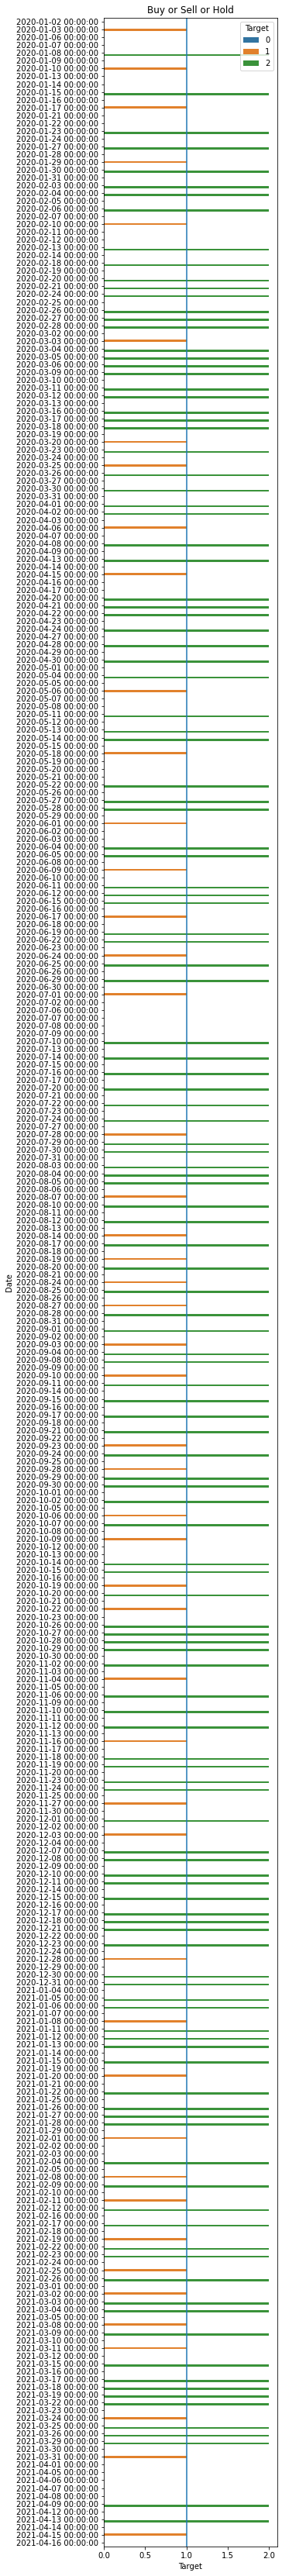

In [88]:
colors=[]
[colors.append('Red') if x=='2' else colors.append('Green') if x==1 else colors.append('White') for x in df['Target']]
plt.figure(figsize=(4,60))
#names.arg = colors
today = datetime.datetime.today()
filter=df.index.year >=  today.year-1
results=df[filter]

sns.barplot(data=results, x='Target', y=results.index, hue='Target')
plt.axvline(x=1, ymin=0, ymax=1)
plt.title('Buy(1) or Sell(2) or Hold(0)')
plt.show()

   Buy_Count  Incidence  Size
0          0          2   255
1          1          0   157
2          2          1    81
3          3          0    44
4          4          0    23
5          5          0     9
6          6          0     5
7          7          0     3
Number of Buys in the Data 44
Number of days holding Unnamed: 0    84
High          84
Low           84
Open          84
Close         84
Volume        84
Adj Close     84
Shifted 1D    84
Shifted 2D    84
Open_PCT      84
Buy_Count     84
Action        84
Target        84
dtype: int64
Incidence shows the average target value for each group


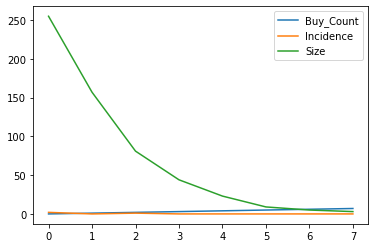

In [89]:
def create_pig_table(basetable, target, variable):
  
    # Create groups for each variable
    groups = basetable[[target,variable]].groupby(variable)
    
    pig_table=groups[target].agg([np.mean, np.size]).reset_index()
    pig_table=pig_table.rename(columns={'mean':'Incidence','size':'Size'})
    #pig_table = groups[target].agg({'Incidence' : np.mean, 'Size' : np.size}).reset_index()

    # Return the predictor insight graph table
    return pig_table

pig_table = create_pig_table(df, "Target", "Buy_Count")
print(pig_table)

print("Number of Buys in the Data", len(df[df['Buy_Count']==3]))

print("Number of days holding", df[(df["Action"]=='Hold')].count())

print("Incidence shows the average target value for each group")

pig_table.plot()
plt.show()

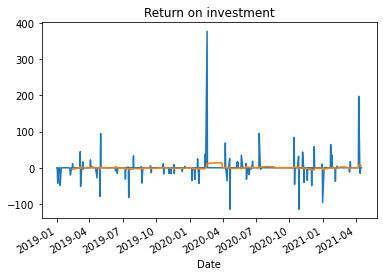

In [90]:
#df['Return']=df[df['Open']]
sellAmt=0
sellIndex=0
buyAmt=0
df['Return']=0
previousAction=""
for index in range(len(df)):
    count=0
    for index2 in (range(index,0,-1)):
        row=df.iloc[index2]
        #Print(row.Action, row.Open, row.Return)
        if row.Action=='Sell':
            if previousAction=='Sell':
                break
            sellAmt=row.Open
            sellIndex=index2
        if row.Action=='Buy' and (previousAction=='Hold' or previousAction=='Sell'):
            #print("Buy", sellIndex,index2)
            buyAmt=row.Open
            #print("Return",  previousAction, buyAmt,sellAmt,index2,sellIndex)
            df.iloc[sellIndex, df.columns.get_loc('Return')]=sellAmt-buyAmt
            break
        if row.Action=='No Action':
            break
        previousAction=row.Action
            
    #df.iloc[index, df.columns.get_loc('Buy_Count')]=count

#for key,item in df.iterrows():
#    print(item.Action,item.Open, "Return", item.Return)


df['Return_Avg'] = df['Return'].rolling(
    window=30,
    center=False
).mean()

df['Return'].plot()
df['Return_Avg'].plot()
plt.title('Return on investment')
plt.show()

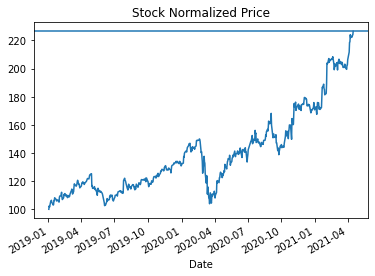

In [91]:
first_price=df['Open'].iloc[0]
last_price=df['Open'].iloc[len(df)-1]/first_price*100

normalized=df.Open.div(first_price).mul(100)
normalized.plot(title='Stock Normalized Price')
plt.axhline(y=last_price, xmin=0, xmax=1)
plt.show()


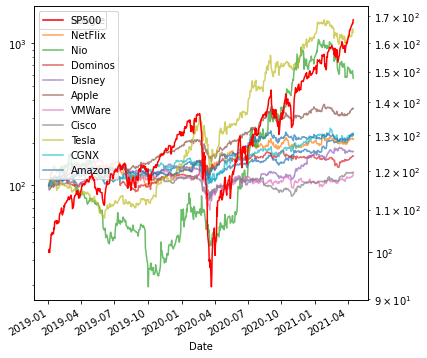

In [92]:
google['Normalized']=google['Open'].div(google['Open'].iloc[0]).mul(100)
microsoft['Normalized']=microsoft['Open'].div(microsoft['Open'].iloc[0]).mul(100)
tesla['Normalized']=tesla['Open'].div(tesla['Open'].iloc[0]).mul(100)
nio['Normalized']=nio['Open'].div(nio['Open'].iloc[0]).mul(100)
netflix['Normalized']=netflix['Open'].div(netflix['Open'].iloc[0]).mul(100)
dominos['Normalized']=dominos['Open'].div(dominos['Open'].iloc[0]).mul(100)
disney['Normalized']=disney['Open'].div(disney['Open'].iloc[0]).mul(100)
apple['Normalized']=apple['Open'].div(apple['Open'].iloc[0]).mul(100)
vmware['Normalized']=vmware['Open'].div(vmware['Open'].iloc[0]).mul(100)
sp500['Normalized']=sp500['Open'].div(sp500['Open'].iloc[0]).mul(100)
cisco['Normalized']=cisco['Open'].div(cisco['Open'].iloc[0]).mul(100)
cgnx['Normalized']=cgnx['Open'].div(cgnx['Open'].iloc[0]).mul(100)
amazon['Normalized']=amazon['Open'].div(amazon['Open'].iloc[0]).mul(100)


compare=google.merge(microsoft['Normalized'],on='Date',how='left').rename(columns={'Normalized_x':'Google','Normalized_y':'Microsoft'}).drop(columns=['Volume','High','Low','Close','Adj Close']).fillna(0)
compare=compare.merge(netflix['Normalized'],on='Date',how='left').rename(columns={'Normalized':'NetFlix'}).fillna(0)
compare=compare.merge(nio['Normalized'],on='Date',how='left').rename(columns={'Normalized':'Nio'}).fillna(0)
compare=compare.merge(tesla['Normalized'],on='Date',how='left').rename(columns={'Normalized':'Tesla'}).fillna(0)
compare=compare.merge(dominos['Normalized'],on='Date',how='left').rename(columns={'Normalized':'Dominos'}).fillna(0)
compare=compare.merge(disney['Normalized'],on='Date',how='left').rename(columns={'Normalized':'Disney'}).fillna(0)
compare=compare.merge(apple['Normalized'],on='Date',how='left').rename(columns={'Normalized':'Apple'}).fillna(0)
compare=compare.merge(vmware['Normalized'],on='Date',how='left').rename(columns={'Normalized':'VMWare'}).fillna(0)
compare=compare.merge(sp500['Normalized'],on='Date',how='left').rename(columns={'Normalized':'SP500'}).fillna(0)
compare=compare.merge(cisco['Normalized'],on='Date',how='left').rename(columns={'Normalized':'Cisco'}).fillna(0)
compare=compare.merge(cgnx['Normalized'],on='Date',how='left').rename(columns={'Normalized':'CGNX'}).fillna(0)
compare=compare.merge(amazon['Normalized'],on='Date',how='left').rename(columns={'Normalized':'Amazon'}).fillna(0)

#print(compare)



#compare=compare.div(compare.iloc[0]).mul(100)

tickers=['Google','NetFlix','Nio','Dominos','Disney','Apple','VMWare','Cisco','Tesla','CGNX','Amazon']
#tickers=['Nio','Tesla']
#print(compare)
fig,ax=plt.subplots(figsize=(6,6))
plt.yscale("log")
compare[tickers].plot(ax=ax,alpha=.7)
twin_ax=ax.twinx()
compare[['SP500']].plot(ax=twin_ax, c='red')
plt.yscale("log")
plt.show()


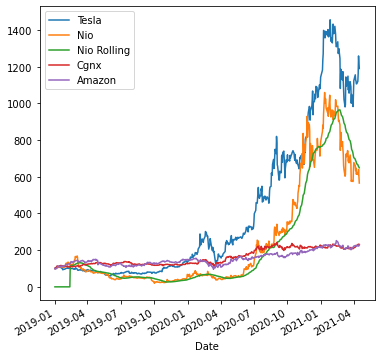

In [93]:
#print(compare)
nio_rolling_30=nio.rolling(window=30).mean()

fig,ax=plt.subplots(figsize=(6,6))
tesla['Normalized'].plot(ax=ax)
nio['Normalized'].plot(ax=ax)
nio_rolling_30['Normalized'].fillna(0).plot(ax=ax)
amazon['Normalized'].plot(ax=ax)
cgnx['Normalized'].plot(ax=ax)
plt.legend(['Tesla','Nio','Nio Rolling','Cgnx','Amazon'])
plt.show()


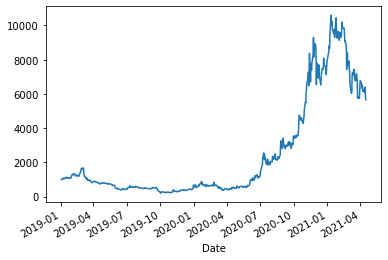

In [94]:
investment=1000
returns=nio['Open'].pct_change()

returns_plus_one = returns.add(1)
cumulative_return = returns_plus_one.cumprod()

# Calculate and plot the investment return here 
cumulative_return.mul(investment).plot()
plt.show()

Simulate the sp500


C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


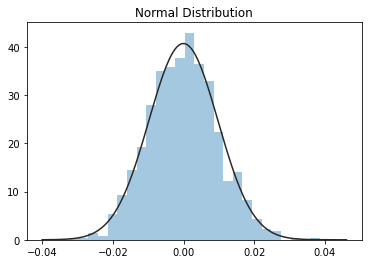

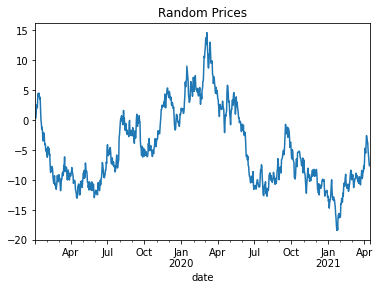

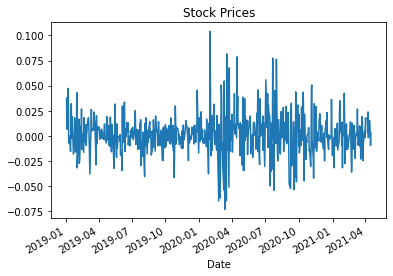

C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


The sp500 does the fit the normal distribution well having more outliers


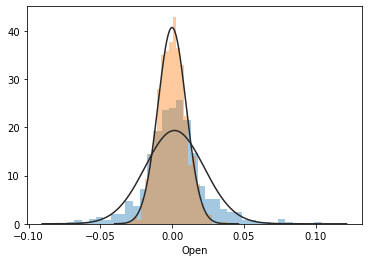

In [95]:
print("Simulate the sp500")

seed(42)

#obj=sp500
obj=amazon
dates=pd.date_range(start=obj.index.min(), end=obj.index.max(),freq='D')

random_returns= normal(loc=0, scale=.01, size=len(dates))
sns.distplot(random_returns, fit=norm, kde=False)
plt.title('Normal Distribution')
plt.show()

#print(len(dates),len(random_returns))
return_df=pd.DataFrame({'date':dates,'prices':random_returns})
return_df=return_df.set_index('date')
#print(return_df)

random_prices=return_df.prices.add(1).cumprod().sub(1)
random_prices.mul(100).plot()
plt.title('Random Prices')
plt.show()

returns_obj=obj['Open'].pct_change()
returns_obj.plot()
plt.title('Stock Prices')
plt.show()

sns.distplot(returns_obj, fit=norm, kde=False)
sns.distplot(random_returns, fit=norm, kde=False)
print("The sp500 does the fit the normal distribution well having more outliers")

randomly sample from data
Date
2019-01-02    2476.959961
2019-01-03       0.997554
2019-01-04       0.986628
2019-01-07       0.987981
2019-01-08       1.007573
dtype: float64


<AxesSubplot:xlabel='Date'>

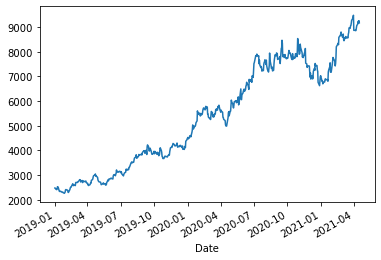

In [96]:
print ('randomly sample from data')
sample=returns_obj.dropna()
n_obs= returns_obj.count()
random_walk = choice(sample, size=n_obs)

random_walk = pd.Series(random_walk, index=sample.index)
#random_walk.head()

start = sp500['Open'].first('D')

sp500_random = start.append(random_walk.add(1))
print(sp500_random.head())

sp500_random= sp500_random.cumprod()
sp500_random.plot()

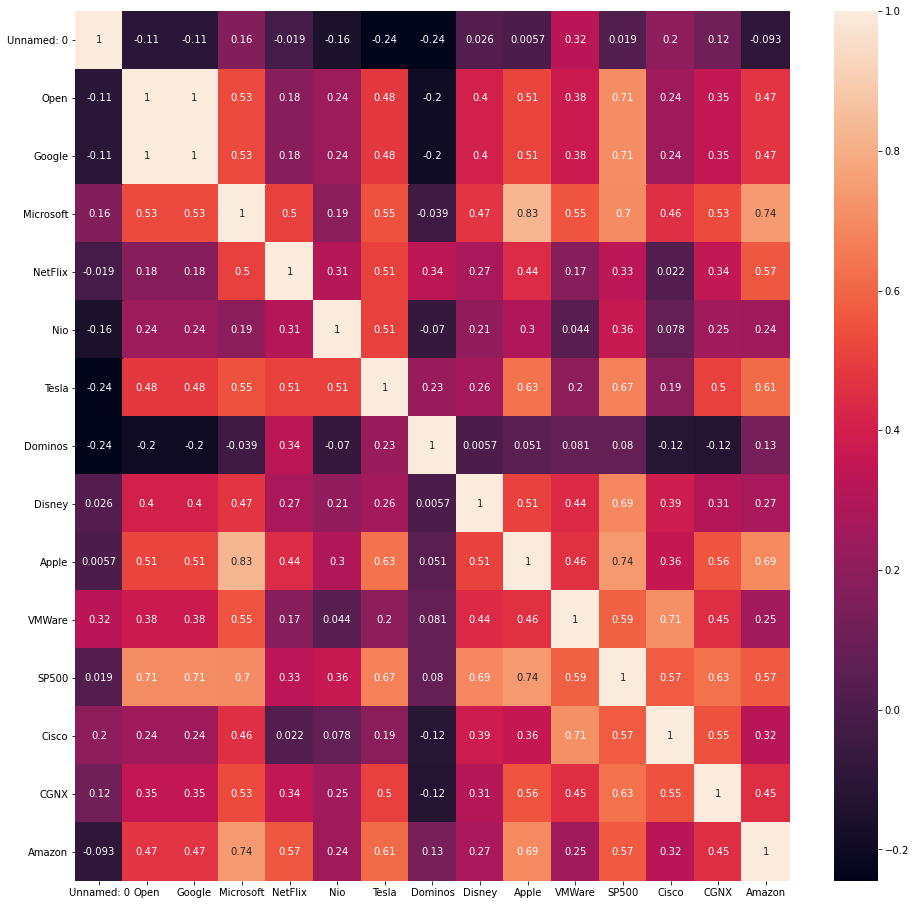

In [97]:
#print(compare)
growth=compare.resample('M').last()
growth_returns= growth.pct_change()

correlations=growth_returns.corr()
plt.figure(figsize=(16,16))
sns.heatmap(correlations,annot=True)
plt.show()

How much money was added to the comparision
compare capitalization 4570.716517583049
Determine the return by index
Index Return 197.31%


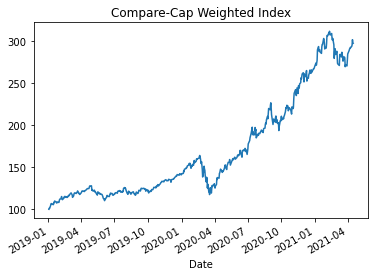

In [98]:
agg_compare_cap=compare.sum(axis=1)
index=agg_compare_cap.div(agg_compare_cap.iloc[0]).mul(100)
index.plot(title='Compare-Cap Weighted Index')

print('How much money was added to the comparision')
print("compare capitalization", agg_compare_cap.iloc[-1] - agg_compare_cap.iloc[0])

print('Determine the return by index')


index_return = (index.iloc[-1] / index.iloc[0] -1) * 100 
print("Index Return {0:.2f}%".format(index_return))

